In this assignment you will work on RBF networks. Always show how you arrived at your answer. Hand in your assignment by adding the solutions to this notebook file.

<H3>Exercise 1 (7 points)</H3>

In this exercise you will implement an RBF network yourself. First training and test data is created by taking random 2D coordinates as input data $\mathbf{X}$ and a function output at those coordinates as output data $\mathbf{Y}$.

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

X, Y, Z = axes3d.get_test_data(0.1)

# sample training data points
X_train = np.vstack([X[::2,::2].flatten(), Y[::2,::2].flatten()])
T_train = Z[::2,::2].flatten()

# sample test data points
X_test = np.vstack([X[1::2,1::2].flatten(), Y[1::2,1::2].flatten()])
T_test = Z[1::2,1::2].flatten()


We now provide an implementation of RBF_train and RBF_test functions, as well as a script to test whether the trained RBF can approximate the function we wish to learn. Note that the RBF_train function is incomplete. It is up to you to write that function and show that the function of interest can be learned. You can for simplicity select datapoints at random to define the centers of your kernel. You can use scipy's *pdist* and *pinv* functions to simplify your code.

In [6]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.linalg import pinv
import random

def rbf_train(K, X, T):
    # input:
    # M x N training samples X
    # 1 x N target outputs T
    #
    # output:
    # K x M prototype vectors mu
    # 1 x 1 scalar Gaussian with sigma
    # K x 1 output weights w

    [M,N] = X.shape
    

    # select K datapoints at random

    mu = np.array(random.sample(X.T, K)).T

    # compute global distance parameter
    
    d_max = max(pdist(mu))
    sigma = d_max/(np.sqrt(2*K))
        
    # compute w
    hidden = np.zeros([N,K])
    for n in range(N):
        for k in range(K):
            hidden[n,k] = np.exp(-(1/(2*sigma**2))*norm(X[:,n]-mu[:,k])**2);

    w = np.dot(pinv(hidden), T)   
    
    
    return [mu, sigma, w]

In [7]:
from numpy.linalg import norm

def rbf_test(X, mu, sigma, w):
    # input:
    # M x N samples X
    # M x K prototype vectors mu
    # 1 x 1 scalar Gaussian with sigma
    # K x 1 output weights w
    #
    # output:
    # output activations aO and hidden activations aH for an RBF network

    N = X.shape[1]
    K = mu.shape[1]

    aH = np.zeros([K,N])
    aO = np.zeros([1,N])

    for n in range(N):

        hidden = np.zeros([1,K])
        for k in range(K):
            hidden[0,k] = np.exp(-(1/(2*sigma**2))*norm(X[:,n]-mu[:,k])**2);

        output = np.dot(hidden,w)

        aH[:,n] = hidden
        aO[0,n] = output

    return [aO, aH]

Train and test RBF and plot the ground truth and the estimate for the test data to check if the function was well-approximated. 

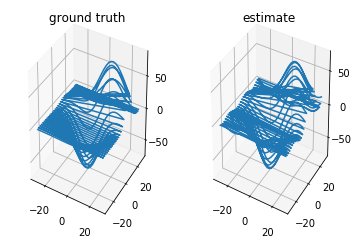

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# run RBF training with 50 kernels
[mu,sigma,w] = rbf_train(50, X_train, T_train)

# predict outputs using RBF network
[Y_test,_] = rbf_test(X_test,mu,sigma,w)

# plot the outputs
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(X_test[0,:],X_test[1,:],T_test)
plt.title('ground truth');
ax = fig.add_subplot(122, projection='3d')
ax.plot_wireframe(X_test[0,:],X_test[1,:],Y_test)
plt.title('estimate');

<H3>Exercise 2 (3 points)</H3>

Finally, run the RBF algorithm with a varying number of kernels *k* and show how the interpolation performance changes as a function of *k*. Use up to 30 kernels for this analysis.

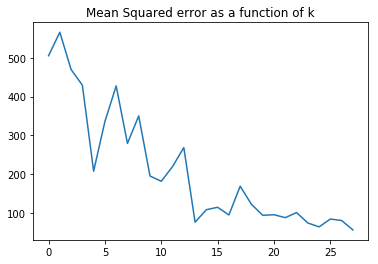

In [9]:

MSE_vector = []
for k in range(2, 30):    
    # run RBF training with k kernels
    [mu,sigma,w] = rbf_train(k, X_train, T_train)
    # predict outputs using RBF network
    [Y_test,_] = rbf_test(X_test,mu,sigma,w)

    MSE = np.mean((Y_test - T_test)**2)
    
    MSE_vector.append(MSE)

    
plt.plot(MSE_vector)
plt.title('Mean Squared error as a function of k')
